<a href="https://colab.research.google.com/github/martuscellifaria/MachineLearning/blob/main/17_Arrangement_of_supermarket_products_using_eclat_association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Arrangement of supermarket products using eclat association**
A supermarket wants to have an optimized product layout where, based on customers purchase database, a link between products is established, and then place products next to each other to increase the  incomes.
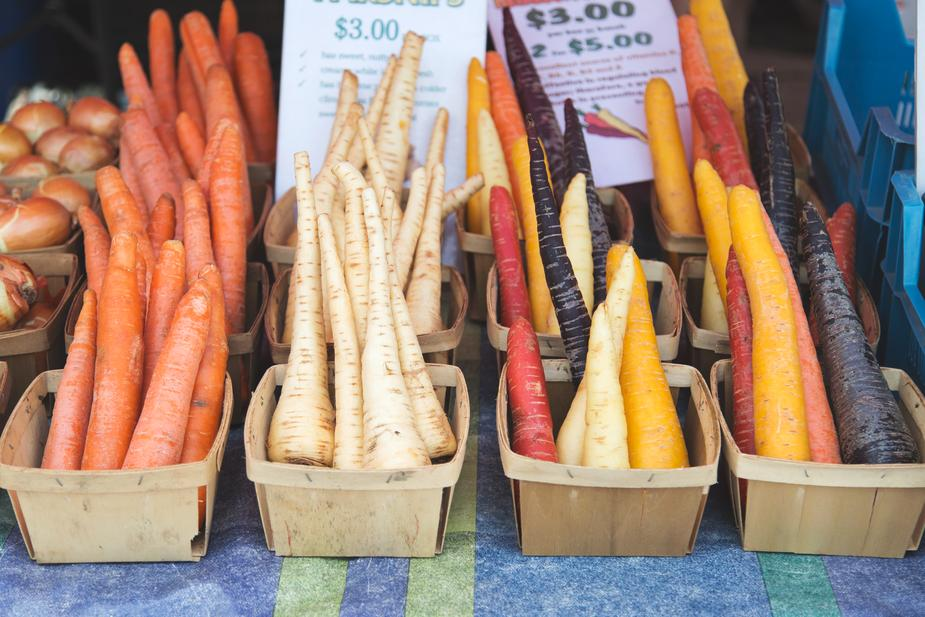

#**Pre-algorithm step**
We'll need an additional library that is called ***apyori***. Its installation follows.

In [1]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=b19e8d2366c626f8e1573a6562ac86502e4deed07cb968e81f4883915f2fa1eb
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


#**01. Importing libraries**
Once again, the main libraries follow:

*   Numpy - Perform mathematical operations;
*   Pandas - Perform data manipulation and analysis;
*   Matplotlib - Library for plotting and visualizing data.



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **02. Loading data from a .csv file**
Let us load the Mall_Customers.csv file and allocate their columns to vector X. We will use the *.head() to show the first five entries of the table.

In [10]:
dataset= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Study Datasets/Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **03. Applying a priori model to the dataset**
Before triggering the Eclat, we'll need the a priori model so, we'll be using the downloaded library ***apyori*** once again.

In [12]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

#**04. Visualizing the eclat results**
The eclat association is a supporting association, so we'll list the support in descending order.

In [13]:
results = list(rules)
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    return list(zip(lhs, rhs, supports))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Product 1', 'Product 2', 'Support'])
resultsinDataFrame.nlargest(n = 10, columns = 'Support')

,Product 1,Product 2,Support
4,herb & pepper,ground beef,0.015998
7,whole wheat pasta,olive oil,0.007999
2,pasta,escalope,0.005866
1,mushroom cream sauce,escalope,0.005733
5,tomato sauce,ground beef,0.005333
8,pasta,shrimp,0.005066
0,light cream,chicken,0.004533
3,fromage blanc,honey,0.003333
6,light cream,olive oil,0.003200


#**05. Conclusion**
From the eclat association, herb & pepper and ground beef are the most bought together items and therefore shall be placed near to each other, as it may induce the buyers to take both of them.